# Updating plot of FBtr0331261 abundance
---------------

# Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
df_all = pd.read_csv("~/qbb2021/data/fpkms.csv", index_col="t_name")
df_all

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,,
FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591


# Subset transcript of interest

In [3]:
goi = "FBtr0331261"
df_male = df_all.loc[goi, 'male_10':'male_14D']
df_female = df_all.loc[goi, 'female_10':]
print('Male data:\n{}'.format(df_male))
print('\nFemale data:\n{}'.format(df_female))

Male data:
male_10           0
male_11           0
male_12           0
male_13           0
male_14A          0
male_14B          0
male_14C          0
male_14D    2.11732
Name: FBtr0331261, dtype: object

Female data:
female_10           0
female_11           0
female_12           0
female_13           0
female_14A    46.0339
female_14B    30.6056
female_14C    38.9564
female_14D    124.908
Name: FBtr0331261, dtype: object


#### We want to use the stages of development (without sexes) as the x axis

In [4]:
x_14 = ['14A', '14B', '14C', '14D']
x = list(range(10, 14)) + x_14
x

[10, 11, 12, 13, '14A', '14B', '14C', '14D']

# Load in data for Stage 14 replicates
- This data is different from the stage 14 data in the original fpkms file

In [5]:
df_14 = pd.read_csv("~/qbb2021/data/replicates.csv", index_col="t_name")
df_14

,male_14A,male_14B,male_14C,male_14D,female_14A,female_14B,female_14C,female_14D,gene_name
t_name,,,,,,,,,
FBtr0114258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CR41571
FBtr0346770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CG45784
FBtr0302440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CR12798
FBtr0302347,22.995892,38.139065,11.577139,20.456739,60.885391,13.378373,12.462192,17.807884,CR40182
FBtr0346769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CG45783
...,...,...,...,...,...,...,...,...,...
FBtr0114187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CR40502
FBtr0304147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CR40719
FBtr0114216,1.459697,0.731757,2.716971,65.821503,2.207145,0.900668,1.074907,2.320014,CR40679


In [6]:
df_14_male = df_14.loc[goi, :'male_14D']
df_14_female = df_14.loc[goi, 'female_14A':'female_14D']
print('Male data:\n{}'.format(df_14_male))
print('\nFemale data:\n{}'.format(df_14_female))

Male data:
male_14A    0
male_14B    0
male_14C    0
male_14D    0
Name: FBtr0331261, dtype: object

Female data:
female_14A          0
female_14B    79.1035
female_14C    182.233
female_14D    2.40947
Name: FBtr0331261, dtype: object


# Plot time course
- Plotting first dataset as time course
- Second, supplemental dataset will be plotted as '+' signs on top of the time course

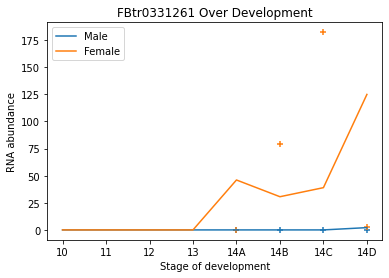

In [15]:
fig, ax = plt.subplots()
ax.plot(x, df_male, label='Male')
ax.plot(x, df_female, label='Female')
ax.scatter(x_14, df_14_male, marker='+')
ax.scatter(x_14, df_14_female, marker='+')
ax.set_title('FBtr0331261 Over Development')
ax.set_xlabel('Stage of development')
ax.set_ylabel('RNA abundance')
plt.legend()
plt.show()